In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()


'C:\\Users\\USX28939\\PYTHON_CODE_BASE\\GitHub_Doc\\TensorFlow_Framework'

In [14]:
for file in os.listdir('C:\\R_Lang\\Hackathons\\Kaggle\\Google Landmark Recognition Challenge\\train.csv\\):
    print(file)

SyntaxError: invalid syntax (<ipython-input-14-0de7c9378d69>, line 1)

In [3]:
#import final_1

In [4]:
#final_1.loader()

In [5]:
import multiprocessing
numProcessors = multiprocessing.cpu_count()
print(numProcessors)

4


In [6]:
import pandas as pd

In [11]:
train_data =  pd.read_csv("C:\\R_Lang\\Hackathons\\Kaggle\\Google Landmark Recognition Challenge\\train.csv\\train.csv")

In [12]:
type(train_data)

pandas.core.frame.DataFrame

In [13]:
len(train_data)

1225029

In [14]:
train_data.head(10)

,id,url,landmark_id
0,cacf8152e2d2ae60,http://static.panoramio.com/photos/original/70...,4676
1,0a58358a2afd3e4e,http://lh6.ggpht.com/-igpT6wu0mIA/ROV8HnUuABI/...,6651
2,6b2bb500b6a38aa0,http://lh6.ggpht.com/-vKr5G5MEusk/SR6r6SJi6mI/...,11284
3,b399f09dee9c3c67,https://lh3.googleusercontent.com/-LOW2cjAqubA...,8429
4,19ace29d77a5be66,https://lh5.googleusercontent.com/-tnmSXwQcWL8...,6231
5,2c9c54b62f0a6a37,https://lh5.googleusercontent.com/-mEaSECO7D-4...,10400
6,0aac70a1de44ced6,http://lh6.ggpht.com/-cJMh9AYQGk8/SOkF_Q5PrjI/...,9779
7,de770bc720f8e714,https://lh4.googleusercontent.com/-Q_FvRlwaaa8...,11288
8,dc9457d703e612ad,https://lh3.googleusercontent.com/-Px33Q-wekRI...,13170
9,3060f5f75d936abb,http://lh3.ggpht.com/-KXyELwqwp_Q/Ry-qmQAqwUI/...,6051


In [21]:
len(train_data.landmark_id.unique())

14951

In [37]:
#train_data.groupby(['landmark_id']).count()

In [86]:
groupby = train_data.groupby(['landmark_id']).count().sort_values(by = ['id'],ascending=False)
print(t.head(4))

                id    url
landmark_id              
9633         50337  50337
6051         50148  50148
6599         23415  23415
9779         18471  18471


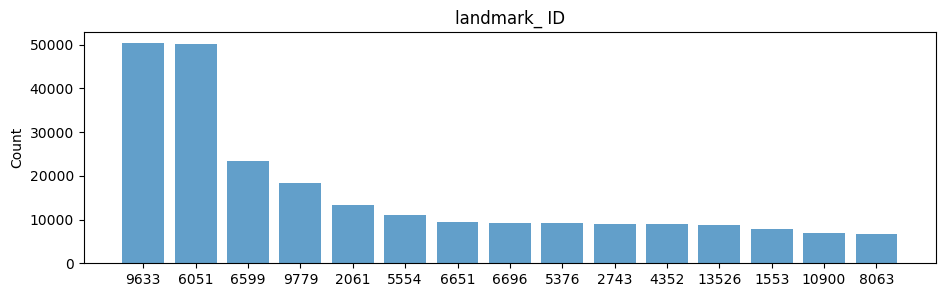

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = groupby.index[0:15]
y_pos = np.arange(len(objects))
performance = t['url'][0:15]
plt.figure(figsize=(11,3)) # determine the size of the plot
plt.bar(y_pos, performance, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('landmark_ ID')

plt.show()

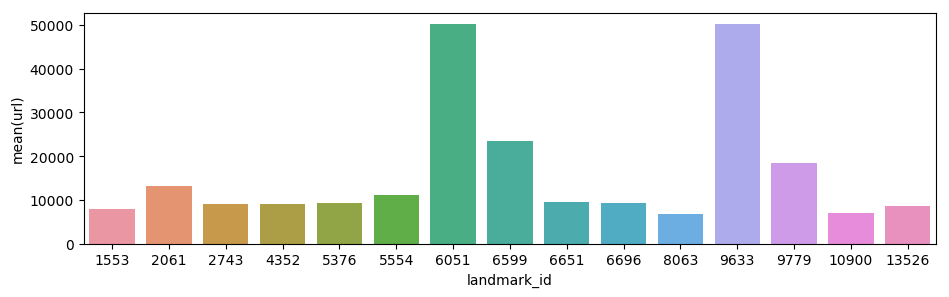

In [95]:
plt.figure(figsize=(11,3))
sns.barplot(x= groupby.index[0:15], y = t['url'][0:15])
plt.show()

In [96]:
groupby.index[0:15]

Int64Index([ 9633,  6051,  6599,  9779,  2061,  5554,  6651,  6696,  5376,
             2743,  4352, 13526,  1553, 10900,  8063],
           dtype='int64', name='landmark_id')

In [99]:
train_data.nunique() # this is used for the dataframes

id             1225029
url            1225029
landmark_id      14951
dtype: int64

In [128]:
train_data.landmark_id.unique # this is used for the series

TypeError: 'method' object is not subscriptable

In [129]:
import h5py as h5

In [120]:
submit_df = pd.read_csv('C:\\R_Lang\\Hackathons\\Kaggle\\Google Landmark Recognition Challenge\\sample_submission.csv\\sample_submission.csv')

In [114]:
train_data['landmark_id'].value_counts().sum()
#plt.show()

1225029

In [115]:
def_guess = train_data['landmark_id'].value_counts()/train_data['landmark_id'].value_counts().sum()

In [122]:
def_guess[1]

2.4489216173657928e-06

In [123]:
submit_df['landmarks'] = '%d %2.2f' % (def_guess.index[0], def_guess.values[0])
submit_df.to_csv('C:\\R_Lang\\Hackathons\\Kaggle\\Google Landmark Recognition Challenge\\sample_submission.csv\\submission1.csv', index=False)
submit_df.sample(2)

,id,landmarks
81373,b1694d4d05e70c0d,9633 0.04
31815,454bbd205a9439b8,9633 0.04


In [124]:
np.random.seed(2018)
r_idx = lambda : np.random.choice(def_guess.index, p = def_guess.values)

In [125]:
%%time
r_score = lambda idx: '%d %2.4f' % (def_guess.index[idx], def_guess.values[idx])
submit_df['landmarks'] = submit_df.id.map(lambda _: r_score(r_idx()))
submit_df.to_csv('C:\\R_Lang\\Hackathons\\Kaggle\\Google Landmark Recognition Challenge\\sample_submission.csv\\submission2.csv', index=False)
submit_df.sample(2)

Wall time: 20.9 s
